___
# A1 - Avaliação de Ciência dos dados 

## 2022 - 2o. semestre 

___


## NOME: Lucca Lozano Nasser

In [41]:
# %matplotlib inline
import math
from math import sqrt

import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from IPython.display import display  # Para ter melhor print.

# Pode trazer mais bibliotecas, caso julgue interessante!!

<div id="indice"></div>

## Índice

1. [Pergunta 1](#p1)

1. [Pergunta 2](#p2)

1. [Pergunta 3](#p3)

1. [Pergunta 4](#p4)

1. [Pergunta 5](#p5)

1. [Pergunta 6](#p5)

<div id="abrindo-arquivo"></div>

___

**Abrindo um arquivo de dados e visualizando seu conteúdo:**


In [2]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
c:\Users\lucca\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\GitHub\CD22-2\quizzes



In [3]:
filename_ds = 'ds_salaries.xlsx'

if filename_ds in os.listdir():
    print(f'Parece que o arquivo {filename_ds} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename_ds}. Lembre-se que precisa estar na mesma pasta do arquivo notebook')

Parece que o arquivo ds_salaries.xlsx está na mesma pasta do notebook, yay!


Abrindo a base de dados:

In [4]:
df_sal = pd.read_excel(filename_ds)

Avaliando as 3 primeiras linhas da base de dados:

In [5]:
df_sal.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441


Avaliando o tipo de cada variável disponível no *dataframe* `df_sal`:

[Voltar ao Índice](#indice)

___
<div id="p1"></div>

## PERGUNTA 1: 
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [10]:
# Seu código Aqui!

freq_absoluta_jobtitles = df_sal['job_title'].value_counts()
freq_absoluta_jobtitles

print(freq_absoluta_jobtitles / len(df_sal))

Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager                    0.

[Voltar ao Índice](#indice)

___
<div id="p2"></div>

## PERGUNTA 2:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [36]:
# Seu código Aqui!
df_2021_ft = df_sal[(df_sal['work_year'] == 2021) & (df_sal['employment_type'] == 'FT')]
df_2021_ft['employee_residence'].value_counts(normalize = True)

paises = ['US', 'IN', 'DE', 'GB', 'FR']

df_paises = df_sal.query('employee_residence in @paises')

df_p_ft = df_paises.query('employment_type == "FT"').sort_values('salary_in_usd')

df_p_ft['salary_in_usd'].mean().round(4)

df_p_ft['salary_in_usd'].quantile(0.35).round(4)

99191.0

[Voltar ao Índice](#indice)

___
<div id="p3"></div>

## PERGUNTA 3:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [45]:
# Seu código Aqui!

pd.crosstab(df_sal['company_size'], df_sal['remote_ratio'])
print(pd.crosstab(df_sal['company_size'], df_sal['remote_ratio'], normalize = True).round(4))

remote_ratio     0       50      100
company_size                        
L             0.0527  0.0988  0.1746
M             0.1301  0.0346  0.3723
S             0.0264  0.0297  0.0807


[Voltar ao Índice](#indice)

<div id="p4"></div>

## PERGUNTA 4:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [61]:

df_in = df_sal.query('employee_residence == "IN"')

corr_me_susd = df_in.monthly_expensies.corr(df_in.salary_in_usd)
corr_me_susd.round(4)

0.5412

[Voltar ao Índice](#indice)

<div id="p5"></div>

## PERGUNTA 5:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

(array([0.05474453, 0.07664234, 0.1040146 , 0.1149635 , 0.0620438 ,
        0.04014599, 0.01642336, 0.00912409, 0.00912409, 0.00729927,
        0.00364964, 0.00182482]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24]),
 <BarContainer object of 12 artists>)

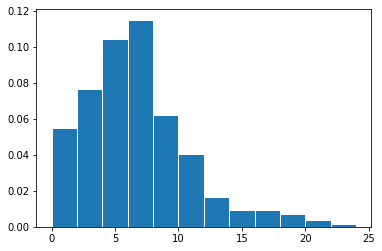

In [72]:
# Seu código Aqui!

df_us = df_sal.query('employee_residence != "US"')

df_us.insert(0, 'salary_10kusd', df_us['salary_in_usd'] / 10000)

esp = np.arange(0, 26, 2)
plt.hist(df_us['salary_10kusd'], bins = esp, density=True, edgecolor='white')

[Voltar ao Índice](#indice)

<div id="p6"></div>

## PERGUNTA 6:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

{'whiskers': [<matplotlib.lines.Line2D at 0x1c803a1b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c803a1bc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c803a1b490>],
 'medians': [<matplotlib.lines.Line2D at 0x1c803a28220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c803a284f0>],
 'means': []}

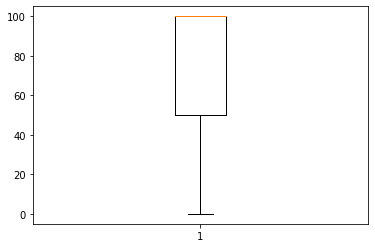

In [86]:
df_22 = df_sal.query('work_year == 2022')

plt.boxplot(df_22['remote_ratio'])

[Voltar ao Índice](#indice)